# <ins>Peripherial Cell Image Classification</ins>

## <ins>Group Members</ins>

    1. Gaurav Pendharkar 20BAI1153
    
    2. Muhesh Kumar B 20BAI1175

## <ins>Faculty<ins>
    Dr. G. Bharadwaja Kumar

# <ins>Introduction</ins>

We process all the images , extract their features and consolidate all the pixel feature into a CSV file.

# Image Processing and Feature Extraction of Images

We aim to extract all the pixel features and obtain a CSV dataset from it in order to train and test models.
- Extracting the pixel matrix of the images.
- Resizing the images to (85,85).
- Transformation of pixel matrix to a row matrix.
- Adding the row as an entry in the dataset with its respective label.

In [ ]:
# CONVERT THE ABOVE POINTS INTO H3s and then add your explanations below them.

# Importing the required modules

In [2]:
# Modules for data handling and linear algebra operations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modules to load the images from the file directory.
import os

# Modules for Image Processing.
from skimage.io import imread, imshow
from skimage import transform
from skimage import color

# Extracting the pixel features from the images

Every image is read from the respective directory. Since, the dataset has images of  seven types of dimensions 360 X 363 and 360 X 361 etc.,(TODO) . Hence, to perform pixel extraction of images to a common dimension to all the images, all the images are resized 85 X 85. This also makes it computationally feasible to perform the feature extraction with the available hardware.

<center>M<sub>360 X 363</sub> &ensp;&ensp; or &ensp;&ensp; M<sub>360 X 361</sub> &ensp;&ensp;   &#8594; &ensp;&ensp;    M<sub>85 X 85</sub></center>

In [31]:
def load_images_from_folder(celltype):
    folder = os.path.join(r"C:\Users\mitug\Cell-Type-Classification\data\Blood Cells",celltype)
    images = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder,filename))
        size = (85,85)
        img1 = transform.resize(img,output_shape=size)
        if img1 is not None:
             images.append(img1)
    return images

Since, all the images are coloured images, each element in the pixel matrix will be having rgb value to resemble the colour.
Hence, we take the mean of the rgb values before any further transformations.
<center>$$mean rgb = \frac{r + g + b}{3}$$</center>

In [32]:
def rgbmean(image):
   for row in range(len(image)):
     for rgb in range(len(image[row])):
        image[row][rgb] = np.mean(image[row][rgb])

In order to obtain a CSV file of the features of the images, we transform the 85 X 85 matrix into a 1 X 7225.
<center> M<sub>85 X 85</sub> &ensp;&ensp;   &#8594; &ensp;&ensp;    M<sub>1 X 7225</sub></center>

In [33]:
def reshaping(x):
    return np.reshape(x,(1,-1))

In [34]:
def reduceDim(x):
    return np.reshape(x,(np.shape(x)[1]))

We now arrange all the 7225 features of each image in a CSV file and append the cell type with it which serves as the target variable for the classification task. 

In [35]:
def reshapeAllNonRgb(images,celltype):
    images_reshaped = list(map(reshaping,images))
    images_reshaped = list(map(reduceDim,images_reshaped))
    df = pd.DataFrame(images_reshaped)
    df['cellType'] = celltype
    return df

We save the obtained CSV file, so that we avoid the huge computational time while exploring the data or training the models.

In [36]:
def writeToCSV(grayscale,rgb,celltype):
    path_grayscale = os.path.join(r"C:\Users\mitug\Cell-Type-Classification\data\csv","dataset_grayscale.csv")
    path_rgb = os.path.join(r"C:\Users\mitug\Cell-Type-Classification\data\csv","dataset_rgb.csv")
    reshapeAllNonRgb(grayscale,celltype).to_csv(path_grayscale,mode='a')
    reshapeAllNonRgb(rgb,celltype).to_csv(path_rgb,mode='a')

Processing all 17,000 images at once is huge memory to be loaded in RAM. Hence, each class's images are processed separately.

For every image class the following tasks are performed:
- Loading the images from the their respective folder.
- Inspecting the dimensions of the data.
- Conversion of the images to grayscale.
- Conversion of the coloured images to its mean rgb image.
- Showing a sample of each kind of image (i.e. grayscale, mean rgb and rgb)
- Performing transoformations and writing to the CSV file.

# Processing the Basophil Images

## Loading the Basophil images

In [37]:
b = load_images_from_folder("basophil")

## Inspecting the dimensions of the image data

In [38]:
len(b)

1218

In [39]:
np.shape(b)

(1218, 85, 85, 3)

## Conversion of images from RGB to Grayscale

In [40]:
b_grayscale = list(map(color.rgb2gray,b.copy()))

## Conversion of RGB image to its mean RGB image

In [41]:
b_rgb = b.copy()
nones = list(map(rgbmean,b_rgb))

## Image Samples

### Grayscale image sample

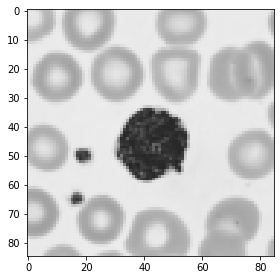

In [42]:
imshow(b_grayscale[0])

### Mean RGB image sample

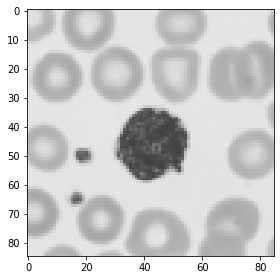

In [44]:
imshow(b_rgb[0])

## Writing the data to CSV file

In [45]:
writeToCSV(grayscale=b_grayscale,rgb=b_rgb,celltype="basophil")

# Processing Lymphocyte Images

## Loading the Lymphocyte images

In [ ]:
l = load_images_from_folder('lymphocyte')

## Inspecting the dimensions of image data

In [47]:
len(l)

1214

In [48]:
np.shape(l)

(1214, 85, 85, 3)

## Conversion of images from RGB to Grayscale

In [49]:
l_grayscale = list(map(color.rgb2gray,l.copy()))

## Conversion of RGB image to its mean RGB image

In [50]:
l_rgb = l.copy()
nones = list(map(rgbmean,l_rgb))

## Image Samples

### Grayscale image sample

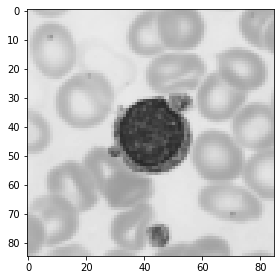

In [51]:
imshow(l_grayscale[0])

### Mean RGB image sample

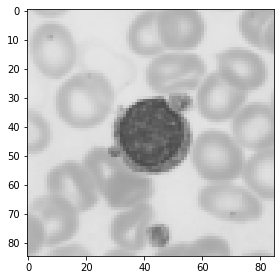

In [52]:
imshow(l_rgb[0])

## Writing the data to CSV file

In [54]:
writeToCSV(grayscale=l_grayscale,rgb=l_rgb,celltype="lymphocyte")

# Processing Erythroblasts Images 

## Loading the Erythroblast images

In [55]:
e = load_images_from_folder('erythroblast')

## Inspecting the dimensions of image data

In [56]:
len(e)

1551

In [57]:
np.shape(e)

(1551, 85, 85, 3)

## Conversion of images from RGB to Grayscale

In [58]:
e_grayscale = list(map(color.rgb2gray,e.copy()))

## Conversion of RGB image to its mean RGB image

In [59]:
e_rgb = e.copy()
nones = list(map(rgbmean,e_rgb))

## Image samples

### Grayscale Image sample

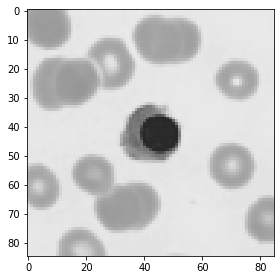

In [60]:
imshow(e_grayscale[0])

### Mean RGB image sample

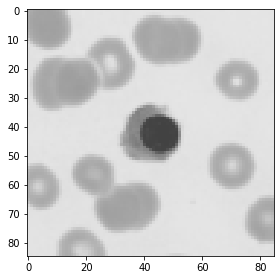

In [61]:
imshow(e_rgb[0])

## Writing the data to CSV file

In [63]:
writeToCSV(grayscale=e_grayscale,rgb=e_rgb,celltype="erythroblast")

# Processing Monocytes Images

## Loading the Monocyte Images

In [64]:
m = load_images_from_folder('monocyte')

## Inspecting the dimensions of image data

In [65]:
len(m)

1420

In [66]:
np.shape(m)

(1420, 85, 85, 3)

## Conversion of images from RGB to Grayscale

In [67]:
m_grayscale = list(map(color.rgb2gray,m.copy()))

## Conversion of RGB image to its mean RGB image

In [68]:
m_rgb = m.copy()
nones = list(map(rgbmean,m_rgb))

## Image samples

### Grayscale image samples

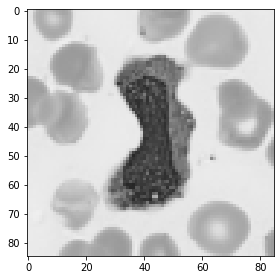

In [69]:
imshow(m_grayscale[0])

### Mean RGB image samples

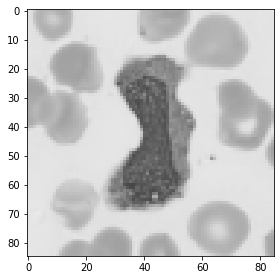

In [70]:
imshow(m_rgb[0])

## Writing image data to CSV file

In [72]:
writeToCSV(grayscale=m_grayscale,rgb=m_rgb,celltype="monocyte")

# Processing Immature Granulocytes Images

## Loading the Immature Granulocyte images

In [73]:
ig = load_images_from_folder('ig')

## Inspecting the dimensions of image data

In [74]:
len(ig)

2895

## Conversion of images from RGB to Grayscale

In [75]:
ig_grayscale = list(map(color.rgb2gray,ig.copy()))

## Conversion of RGB image to its mean RGB image

In [76]:
ig_rgb = ig.copy()
nones = list(map(rgbmean,ig_rgb))

## Image samples

### Grayscale Image samples

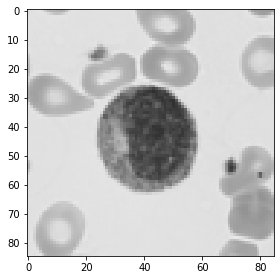

In [77]:
imshow(ig_grayscale[0])

### Mean RGB image samples

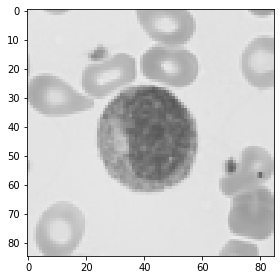

In [78]:
imshow(ig_rgb[0])

## Writing the image data to CSV file

In [80]:
writeToCSV(grayscale=ig_grayscale,rgb=ig_rgb,celltype="immature granulocyte")

# Processing the Platlet Images

## Loading the Platelet images

In [81]:
p = load_images_from_folder('platelet')

## Inspecting the dimensions of image data

In [82]:
len(p)

2348

In [83]:
np.shape(p)

(2348, 85, 85, 3)

## Conversion of images from RGB to Grayscale

In [84]:
p_grayscale = list(map(color.rgb2gray,p.copy()))

## Conversion of RGB image to its mean RGB image

In [85]:
p_rgb = p.copy()
nones = list(map(rgbmean,p_rgb))

## Image samples

### Grayscale sample images

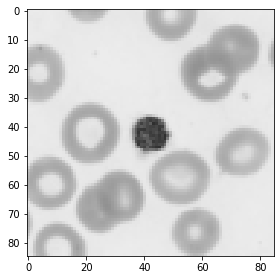

In [86]:
imshow(p_grayscale[0])

### Mean RGB Image sample

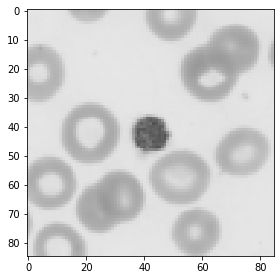

In [87]:
imshow(p_rgb[0])

## Writing the image data to CSV file

In [89]:
writeToCSV(grayscale=p_grayscale,rgb=p_rgb,celltype="platelet")

# Processing Eosinophils Images

## Loading the Eosinophil images

In [90]:
es = load_images_from_folder('eosinophil')

## Inspecting the dimensions of image data

In [91]:
len(es)

3117

In [92]:
np.shape(es)

(3117, 85, 85, 3)

## Conversion of images from RGB to Grayscale

In [93]:
es_grayscale = list(map(color.rgb2gray,es.copy()))

## Conversion of RGB image to its mean RGB image

In [94]:
es_rgb = es.copy()
nones = list(map(rgbmean,es_rgb))

## Image samples

### Grayscale image sample

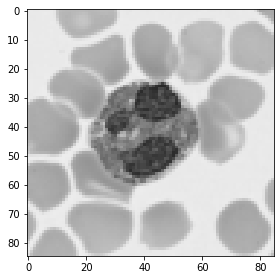

In [95]:
imshow(es_grayscale[0])

### Mean RGB image sample

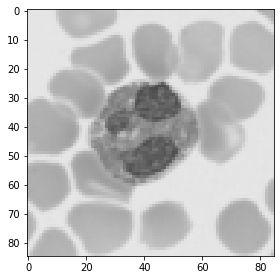

In [96]:
imshow(es_rgb[0])

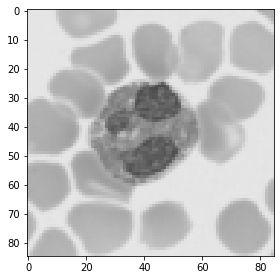

In [97]:
imshow(es[0])

## Writing image data to CSV file

In [98]:
writeToCSV(grayscale=es_grayscale,rgb=es_rgb,celltype="eosinophil")

# Processing Neutrophil Images

## Loading the Neutrophil images

In [99]:
n = load_images_from_folder('neutrophil')

## Inspecting the dimensions of image data

In [100]:
len(n)

3329

In [101]:
np.shape(n)

(3329, 85, 85, 3)

## Conversion of images from RGB to Grayscale

In [102]:
n_grayscale = list(map(color.rgb2gray,n.copy()))

In [103]:
np.shape(n_grayscale)

(3329, 85, 85)

## Conversion of RGB image to its mean RGB image

In [104]:
n_rgb = n.copy()
nones = list(map(rgbmean,n_rgb))

## Image samples

### Grayscale image sample

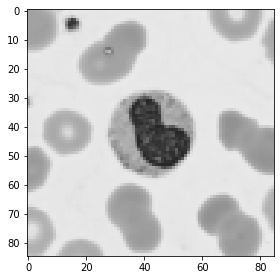

In [105]:
imshow(n_grayscale[0])

### Mean RGB image sample

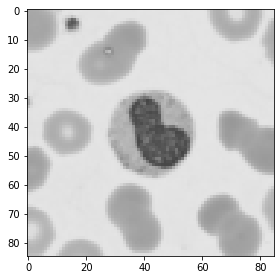

In [106]:
imshow(n_rgb[0])

## Writing the image data to the CSV file

In [108]:
writeToCSV(grayscale=n_grayscale,rgb=n_rgb,celltype="neutrophil")

# <ins>Conclusion<ins>

We have obtained two datasets as follows:
- dataset_grayscale.csv for grayscale image features with the cell type.
- dataset_rgb.csv for mean rgb image features with the cell type.

However, we will be using the grayscale image dataset for exploratory data analysis and model building.